This file aims to identify when a "wrong" 2pi jump occurs.

In [1]:
# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder i.e.: os.path.abspath('')
#   └ This Jupyter notebook(.ipynb)

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path as path
# Add the FYPLibrary folder in the parent level of this folder.
if path.join(path.dirname(path.abspath('')), 'FYPLibrary') not in sys.path:
    sys.path.append(path.join(path.dirname(path.abspath('')), 'FYPLibrary'))

# from pprint import pprint
# pprint(sys.path)

# within this jupyter notebook
from os import listdir
from file_reading import *
import matplotlib.pyplot as plt
from math import pi

In [2]:
# updating of library
from IQ_demod import freq_ratio, signal_to_phase, phase_reconstruction, phase_reconstruction_NEW

In [3]:
# Yield all files in batch folder
folderpath = path.join(path.abspath(''),'traces')
for i, f in enumerate(files:= listdir(path= folderpath)):
    print(f"{i:>3}: {f}")

  0: C1-004Hz-020.2mVpp-80.125000MHz-OneAmp00002.txt
  1: C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt
  2: C1-122Hz-020mVpp-80.125000MHz-OneAmp00001.txt
  3: C2-000Hz-000mVpp-80.1250448MHz00004.txt
  4: C2-000Hz-000mVpp-80.1250448MHz00005.txt


In [4]:
# my_input = int(input("Please specify which file you would like to generate a periodogram of: "))
my_input = 1
NAME = files[my_input]
TXT_FILE_PATH = file_str_to_path(NAME, dir=folderpath)
print(f"{TXT_FILE_PATH = }")
_, mirror_f, mVpp, delta_corr = numerical_variables_from_name(NAME)
print(f"{mirror_f = }, {mVpp = }, {delta_corr = }")

TXT_FILE_PATH = 'd:\\NUS\\Semester 7\\PC4199 Honours Project\\20211215 phase reconstruction experimental\\traces\\C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt'
mirror_f = 4.0, mVpp = 20.4, delta_corr = 80.125


In [24]:
zoom_in_start = 113690
zoom_in_end = zoom_in_start + 30

[Notice] Ignore the following mixed types warning.


C:\Users\Thormund\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3377: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Text(0.5, 0, '$t$/s')

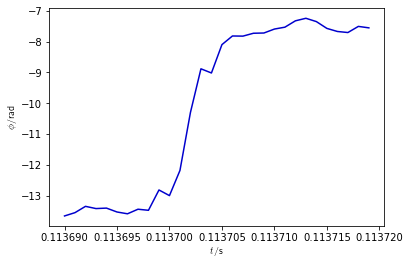

In [25]:
SIGNAL_F = 80.125e6*2 #Hz 
SAMPLING_F = 1.0e6 #Hz
N, _ = freq_ratio(signal=SIGNAL_F, sample=SAMPLING_F)

meta, trace = parse_and_read_oscilliscope_txt(TXT_FILE_PATH)
signal = signal_from_trace(np.asarray(trace))
phases = signal_to_phase(signal, N, 2*pi/N)
phases = phase_reconstruction(phases, 4.1)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])[zoom_in_start:zoom_in_end]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis, phases[zoom_in_start:zoom_in_end], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)


In [26]:
# note that signal in this interval is
print(f"{len(signal) = }")
print(f"{len(phases) = }")
signal[zoom_in_start+N:zoom_in_end+N]

len(signal) = 500002
len(phases) = 499998


array([ 0.0268639 , -0.0311367 , -0.038167  ,  0.0268639 ,  0.0461974 ,
       -0.0241063 , -0.0153183 ,  0.0233487 , -0.00301519, -0.00301519,
        0.00753037, -0.0118031 ,  0.0128031 ,  0.0005    , -0.0364094 ,
        0.00225759,  0.0198335 , -0.00477278, -0.0328943 ,  0.00928796,
        0.00928796, -0.0153183 , -0.0258639 ,  0.00401519,  0.0409246 ,
       -0.00828796, -0.0416822 ,  0.0215911 ,  0.0549854 ,  0.0110456 ])

   -0.201765051 -0.0698037
   -0.201764051 0.0005
   -0.201763051 0.0444398
   -0.201762051 -0.00828796
   -0.201761051 -0.0311367
   -0.201760051 0.00225759
   -0.201759051 0.0497126
   -0.201758051 0.0110456
   -0.201757051 -0.038167
   -0.201756051 -0.0188335
   -0.201755051 0.0110456
   -0.201754051 0.0233487
   -0.201753051 0.0286215
   -0.201752051 0.00753037
   -0.201751051 0.0198335
   -0.201750051 -0.0135607
   -0.201749051 -0.038167
   -0.201748051 0.00753037
   -0.201747051 0.0356519
   -0.201746051 0.0005
   -0.201745051 -0.0399246
   -0.201744051 -0.0205911
   -0.201743051 0.0426822
   -0.201742051 0.0005
   -0.201741051 -0.0364094
   -0.201740051 -0.0118031
   -0.201739051 0.0409246
   -0.201738051 0.0005
   -0.201737051 -0.0451974
   -0.201736051 0.0128031
   -0.201735051 0.0426822
   -0.201734051 0.0110456
   -0.201733051 -0.0293791
   -0.201732051 0.0303791
   -0.201731051 0.0374094
   -0.201730051 0.00225759
   -0.201729051 -0.0416822
   -0.201728051 -0.0241063
   -0.201727051 0.039167
   -0.201726051 0.0145607
   -0.201725051 -0.0170759
   -0.201724051 -0.0153183
   -0.201723051 0.0110456
   -0.201722051 -0.0135607
   -0.201721051 -0.046955
   -0.201720051 0.039167
   -0.201719051 0.056743
   -0.201718051 -0.00477278
   -0.201717051 -0.0241063
   -0.201716051 -0.0416822
   -0.201715051 0.0215911


Modified attempt by determining cumulated dphi.
First without any reconstruction

Text(0.5, 0, '$t$/s')

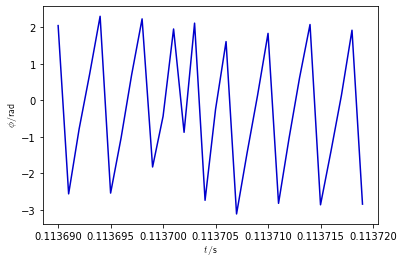

In [27]:
# signal = ... # prev cell
phases = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start:zoom_in_end], phases[zoom_in_start:zoom_in_end], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)

by reconstruction now
formally, arctan2: R x R -> [-pi, pi], but it is safe to think of as [0, 2pi]

i = 113691, case1 = -6.175785340421222, case2 = 0.10739996675836405, delta = 0.10739996675836405
i = 113692, case1 = 0.20464266424071687, case2 = 6.4878279714203035, delta = 0.20464266424071687
i = 113693, case1 = -0.0723368074662668, case2 = 6.210848499713319, delta = -0.0723368074662668
i = 113694, case1 = 0.015256603741857777, case2 = 6.298441910921444, delta = 0.015256603741857777
i = 113695, case1 = -6.409215317046435, case2 = -0.12603000986684876, delta = -0.12603000986684876
i = 113696, case1 = -0.058809993274232975, case2 = 6.2243753139053535, delta = -0.058809993274232975
i = 113697, case1 = 0.14844389387359058, case2 = 6.431629201053177, delta = 0.14844389387359058
i = 113698, case1 = -0.034846594398943775, case2 = 6.248338712780642, delta = -0.034846594398943775
i = 113699, case1 = -5.623137579279315, case2 = 0.6600477279002712, delta = 0.6600477279002712
i = 113700, case1 = -0.1829526125568685, case2 = 6.100232694622718, delta = -0.1829526125568685
i = 113701, case1 = 0.817

Text(0.5, 0, '$t$/s')

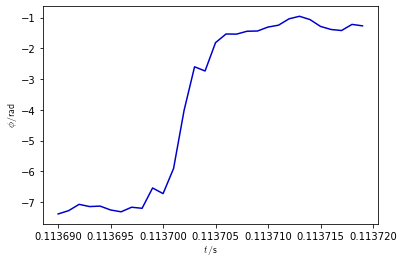

In [28]:
# signal = ... # prev cell
phases = signal_to_phase(signal, N, 2*pi/N, phase_advancement_correction= False)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N) * meta['Sample Interval'][0],
    step= meta['Sample Interval'][0])

dphi = 2*pi/N
results = []
for i, p in enumerate(phases):
    if i != 0:
        expected_phase = phases[i-1] + dphi
        # choose between the least difference (especially when expected phase > 2pi)
        case1 = p- expected_phase # no need to +2pi to anything
        # case2 = (p+ 2*pi) - expected_phase
        case2 = case1 + 2*pi
        delta = case1 if abs(case1) < abs(case2) else case2
        if i > zoom_in_start and i < zoom_in_end:
            print(f"{i = }, {case1 = }, {case2 = }, {delta = }")
        results.append(results[-1]+delta)
    else:
        results.append(p)
    
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start:zoom_in_end], results[zoom_in_start:zoom_in_end], color = 'mediumblue')
ax.set_ylabel(r'$\phi$/rad', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)

In [29]:
# from library
def _get_Is_and_Qs(signal, N, dphi):
    """Internal function. For specified signal, N and dphi, return all 
    Is and Qs.
    
    Input
    ----
    signal (np array): 1D array of y_i over time.
    N (int): number of samples involved in IQ valuation
    dphi (float): expected value of advancement in phase between time 
        intervals. obtained from phase_advance function
    
    Output
    ----
    Is, Qs (np array): I and Q value for each data point, with reference
        to N future data points
    """
    len_signal = len(signal)
    dphi = dphi % (2*pi)

    # lookup tables
    sines = np.sin([i * dphi for i in range(N)])
    cosines = np.cos([i * dphi for i in range(N)])
    # print(f"[Debug] {N = }")
    # print(f"[Debug] {len(sines) = }")

    # summation process # rewrite for direct multiplication
    # Is = (2/N) * np.fromiter([np.sum([signal[j+i]*sines[i] for i in range(N)]) for j in range(len_signal-N)], dtype=np.float64)
    # Qs = (2/N) * np.fromiter([np.sum([signal[j+i]*cosines[i] for i in range(N)]) for j in range(len_signal-N)], dtype=np.float64)
    # print(f"[Debug] {signal[0:N] = }")
    Is = (2/N) * np.fromiter([np.dot(signal[j:j+N], sines) for j in range(len_signal-N)], 
        dtype=np.float64)
    Qs = (2/N) * np.fromiter([np.dot(signal[j:j+N], cosines) for j in range(len_signal-N)], 
        dtype=np.float64)
    return Is, Qs

In [30]:
signal_sample = signal[zoom_in_start+N:zoom_in_end+N]
t_axis_sample = t_axis[zoom_in_start+N:zoom_in_end+N]
print(signal_sample)
Is, Qs = _get_Is_and_Qs(signal_sample, N, 2*pi/N)

[ 0.0268639  -0.0311367  -0.038167    0.0268639   0.0461974  -0.0241063
 -0.0153183   0.0233487  -0.00301519 -0.00301519  0.00753037 -0.0118031
  0.0128031   0.0005     -0.0364094   0.00225759  0.0198335  -0.00477278
 -0.0328943   0.00928796  0.00928796 -0.0153183  -0.0258639   0.00401519
  0.0409246  -0.00828796 -0.0416822   0.0215911   0.0549854   0.0110456 ]


Text(0.5, 0, '$t$/s')

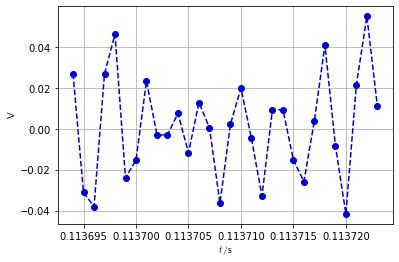

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis_sample,  signal_sample, 'bo', color = 'mediumblue', linestyle='dashed')
plt.grid(True, which='major', axis='both')
ax.set_ylabel(r'V', useTex = True)
ax.set_xlabel(r'$t$/s', useTex = True)

In [32]:
for i, t in enumerate(zip(Is, Qs)):
    print(f"{i:>3}: {t}")

  0: (-0.0290003, 0.03251545)
  1: (-0.0421822, -0.029000300000000003)
  2: (0.025485100000000004, -0.0421822)
  3: (0.03075785, 0.025485100000000004)
  4: (-0.023727500000000002, 0.030757849999999996)
  5: (-0.006151554999999998, -0.0237275)
  6: (0.013181945, -0.0061515549999999995)
  7: (-0.00527278, 0.013181945)
  8: (0.004393955000000001, -0.005272779999999999)
  9: (-0.0026363650000000008, 0.004393955)
 10: (-0.0061515499999999996, -0.0026363650000000003)
 11: (0.02460625, -0.006151549999999997)
 12: (-0.0008787950000000021, 0.02460625)
 13: (-0.02812145, -0.0008787950000000029)
 14: (0.0035151850000000014, -0.02812145)
 15: (0.026363900000000003, 0.0035151850000000036)
 16: (-0.007030370000000002, 0.026363900000000003)
 17: (-0.02109113, -0.007030370000000002)
 18: (0.01230313, -0.02109113)
 19: (0.017575929999999997, 0.01230313)
 20: (-0.009666745000000001, 0.017575929999999997)
 21: (-0.03339425, -0.009666745000000004)
 22: (0.006151575000000003, -0.03339425)
 23: (0.041303400

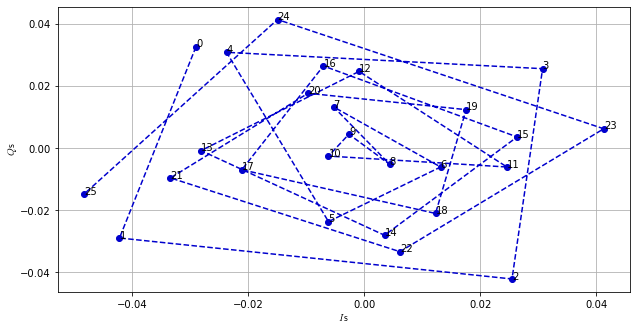

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(Is, Qs, 'bo', color = 'mediumblue', linestyle='dashed')
plt.grid(True, which='major', axis='both')
ax.set_ylabel(r'$Q$s', useTex = True)
ax.set_xlabel(r'$I$s', useTex = True)
for i, t in enumerate(zip(Is, Qs)):
    ax.annotate(i, t)
fig.set_size_inches(11.75-1.5, 8.25-2 - 1)